# Heart Disease Predictor

- This *test* branch is for improving this model.
- I need to know more about this dataset and make my Data Science practices more clear, easy to understand, and more robust.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Life cycle of a Data Science project:
- Data Collection
- Split the dataset into: *train* and *test* data.
- EDA
- Data Preprocessing
- Feature Engineering
- Model building and evaluation
- Model deployment

## Data Collection

In [2]:
data = pd.read_csv('./data/framingham.csv')

In [3]:
data.shape

(4238, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [13]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('TenYearCHD', axis=1), data['TenYearCHD'], test_size=0.3, random_state=0)

- explore train and test data:

In [16]:
print('X_train.shape=', X_train.shape, '\nX_test.shape=', X_test.shape)

X_train.shape= (2966, 15) 
X_test.shape= (1272, 15)


Overview of the following procedure:
1. perform **imputation** on both train & test data seperately.
2. perform **EDA**, **preprocessing**, and **feature engineering** on the train data.
3. perform **preprocessing** on the test data as well, so that it can be a valid information for the model.
4. build model using train data.
5. test it's accuracy using test data: this will be the final accuracy of the model.

## EDA

In [17]:
X_train.isnull().sum()

male                 0
age                  0
education           72
currentSmoker        0
cigsPerDay          26
BPMeds              39
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            267
dtype: int64

In [18]:
X_test.isnull().sum()

male                 0
age                  0
education           33
currentSmoker        0
cigsPerDay           3
BPMeds              14
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                  3
heartRate            0
glucose            121
dtype: int64

- visualize the *null values*

<AxesSubplot:>

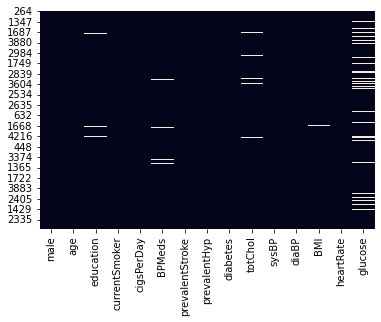

In [19]:
sns.heatmap(X_train.isnull(), cbar=False)

<AxesSubplot:>

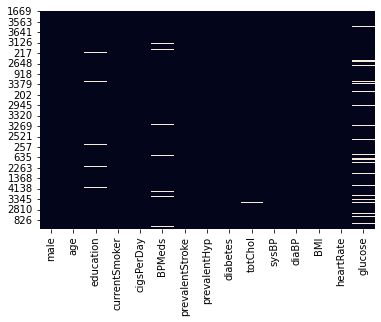

In [20]:
sns.heatmap(X_test.isnull(), cbar=False)

- There are some features having null values so, we need to perform imputation in the train dataset.
- why inputation? why not delete the feature itself?
    - because none of the feature contains more than half null values, infact the maximum null values contained is in *glucose* feature which is 267/2966 = 0.09 or *9%* approx on train data and 121/1272 = 0.095 or *9.5%* approx on test data.

- A python function for unique values:

In [21]:
def unique_vals(col):
    return list(col.unique())

- A python function for count of all unique values in a feature:

In [22]:
def count_unique_vals(col):
    unique_vals = {}
    for i in col:
        if np.isnan(i):
            continue
        if i not in unique_vals:
            unique_vals[i] = 1
        else:
            unique_vals[i] += 1
    return unique_vals

- all unique values of education

In [23]:
unique_vals(X_train.education)

[1.0, 2.0, 3.0, 4.0, nan]

- what impact would **education** have on Ten-year-coronary-heart-disease?
- **NO** impact right?
- So, it's just right to drop this feature itself.
- let's drop it.

In [24]:
X_train.drop('education', axis=1, inplace=True)
X_test.drop('education', axis=1, inplace=True)
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
264,1,57,0,0.0,0.0,0,1,0,176.0,134.0,97.0,38.14,68.0,94.0
385,1,39,0,0.0,0.0,0,0,0,235.0,120.0,80.0,27.23,62.0,87.0
2564,1,54,0,0.0,0.0,0,1,0,207.0,146.0,98.0,23.63,65.0,91.0
3787,0,49,0,0.0,0.0,0,0,0,203.0,125.0,70.0,22.52,72.0,NaN
4139,0,53,0,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0


- in order to perform successfull imputation, without much affecting the dataset, we'll have to categorize those features having null values as **categorical/nominal** or **continuous**.
- referring from the description given for the dataset it's visible that:
    - cigsPerDay, totChol, BMI, heartRate, glucose are **continuous** features.
    - BPMeds is a **nominal** feature.
- Handlling missing values:
    1. for nominal feature: replace with the most frequent value.
    2. for continuous features: perform mean/median imputation.

Distribution of **BPMeds** in the train dataset:

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

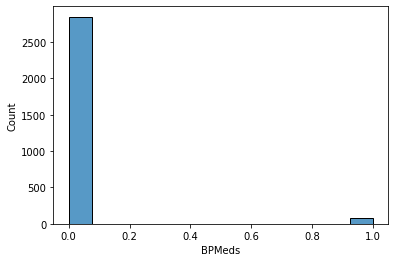

In [26]:
sns.histplot(X_train.BPMeds)

- count unique vals before imputation

In [29]:
print('X_train: ', count_unique_vals(X_train.BPMeds), '\nX_test: ', count_unique_vals(X_test.BPMeds))

X_train:  {0.0: 2847, 1.0: 80} 
X_test:  {0.0: 1214, 1.0: 44}


- most frequent value is **0**
- let's impute it's mode.

In [32]:
X_train['BPMeds'].fillna(X_train.iloc[4].mode().item(), inplace=True)
X_test['BPMeds'].fillna(X_test.iloc[4].mode().item(), inplace=True)
print('X_train:', X_train['BPMeds'].isnull().sum(), '\nX_test:', X_test['BPMeds'].isnull().sum())

X_train: 0 
X_test: 0


In [33]:
print('X_train: ', count_unique_vals(X_train.BPMeds), '\nX_test: ', count_unique_vals(X_test.BPMeds))

X_train:  {0.0: 2886, 1.0: 80} 
X_test:  {0.0: 1228, 1.0: 44}


- So, the missing values of BPMeds are handlled.
- *Nominal value imputation is complete!*
- Now imputing continuous values!
---

In [34]:
X_train.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          26
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            267
dtype: int64

In [35]:
X_test.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           3
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                  3
heartRate            0
glucose            121
dtype: int64

- filling missing values in **continuous** variables.

In [36]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

# imputation removed column names: putting them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

<AxesSubplot:>

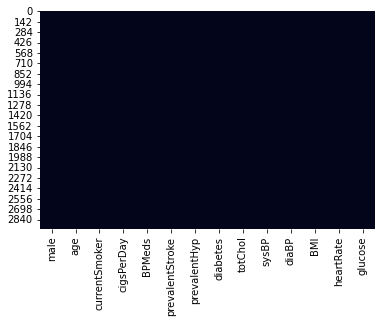

In [37]:
sns.heatmap(imputed_X_train.isnull(), cbar=False)

<AxesSubplot:>

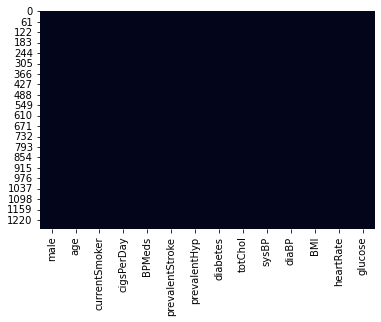

In [38]:
sns.heatmap(imputed_X_test.isnull(), cbar=False)

- Now assign imputed_X_train and imputed_X_test to X_train and X_test respectively.

In [43]:
X_train = imputed_X_train
X_test = imputed_X_test

print('X_train.isnull().sum().sum(): ', X_train.isnull().sum().sum(),
'\nX_test.isnull().sum().sum(): ',X_test.isnull().sum().sum())

X_train.isnull().sum().sum():  0 
X_test.isnull().sum().sum():  0


- Now missing/null values are completely handlled in both X_train and X_test.
- From now on I'll only focus on X_train data for any analysis, and buil the model on it.

- let's analyse relationships between different features and target variable.

<AxesSubplot:xlabel='male', ylabel='Count'>

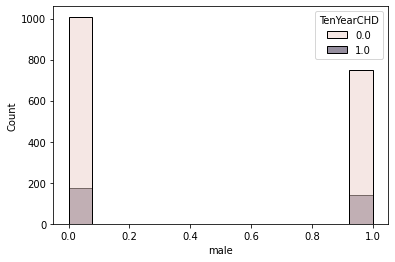

In [207]:
sns.histplot(x=X_train['male'], hue=y_train)

- more males have TenYearCHD than females

39